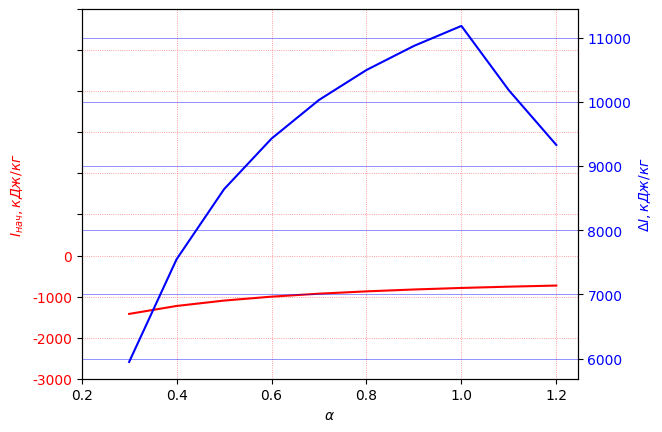

,alpha,S
0,0.3,3.528023
1,0.4,4.772562
2,0.5,5.752301
3,0.6,6.554906
4,0.7,7.243280
5,0.8,7.838834
6,0.9,8.366242
7,1.0,8.831767
8,1.1,8.224684
9,1.2,7.698711


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


"""
ТОПЛИВО H2O2
"""

"""ВХОДНЫЕ ДАННЫЕ"""
I_G = -3843    # Удельная (полная) энтальпия горючего
I_O = -405     # Удельная (полная) энтальпия оксилителя
KM_0 = 7.937   # Стехиометрическое соотношение

# Энтальпия, посчитанная в АСТРА при Т_ст = 1000
I_wall = [-7370, -8777, -9737, -10430, -10960, -11370, -11700, -11974, -10940, -10061]

# Следующие значения посчитаны для alpha в АСТРА 
alpha = np.arange(0.3, 1.3, 0.1)
T_og =   [ 2098,  2581,  2966,  3256,   3458,   3582,   3640,   3650,   3636,   3600]
R_og =   [ 1220,  989,   835,   728,    650,    592,    548,    515,    489,    467]


"""РАСЧЕТ РАЗНОСТЕЙ ЭНТАЛЬПИЙ"""
I_START = I_G * (1 / (1 + alpha*KM_0)) + I_O * (alpha*KM_0 / (1 + alpha*KM_0))
DELTA_I = I_START - I_wall

# Построение графика
def plot_enthalpy():
    # Создание объекта fig и осей ax
    fig, ax = plt.subplots()

    # Построение I_нач графика
    ax.plot(alpha, I_START, color='red')
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$I_{нач}, кДж/ кг$', color='red')
    ax.tick_params(axis='y', labelcolor='red')
    ax.grid(True, linestyle=':', linewidth=0.6, color='red', alpha=0.5)
    # Настройка шкалы ординат по значениям
    y_ticks = np.arange(-3000, 6500, 1000)
    ax.set_yticks(y_ticks)
    # Определение значений, которые будут отображаться на графике
    y_ticklabels = [str(y_tick) if y_tick <= 0 else '' for y_tick in y_ticks]
    # Назначение меток на шкале ординат
    ax.set_yticklabels(y_ticklabels)

    # Создание DELTA_I оси ординат и ее графика
    ax2 = ax.twinx()
    ax2.plot(alpha, DELTA_I, color='blue')
    ax2.set_ylabel(fr'$\Delta I, кДж/ кг$', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.grid(True, linestyle='-', linewidth=0.6, color='blue', alpha=0.5)
    x_ticks = np.arange(0.2, 1.3, .2)
    ax2.set_xticks(x_ticks)

    # Отображение графика
    plt.show()


"""РАСЧЕТ S ФУНКЦИИ"""
def sol_S():
    MU = 340e-7
    T_ST = 1000
    s_function = []
    for alpha in range(0, 10):
        s_function.append(
            DELTA_I[alpha] * (MU**.15 / R_og[alpha]**.425) * (T_og[alpha]**.425 / ((T_og[alpha] + T_ST)**.595 * (3*T_og[alpha] + T_ST)**.15))
        )
    return s_function


"""ВЫВОД"""
plot_enthalpy()
pd.DataFrame({'alpha': alpha, 'S': sol_S()})